## 1. Import Necessary libraries

In [11]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [3]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

### 3.1 Perform Initial Analysis

In [4]:
newspaper_data.shape

(34, 3)

In [5]:
newspaper_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [6]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

## 3.2 ASSUMPTIONS CHECK

## 1. Normality Test

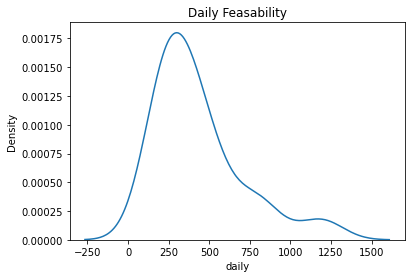

In [12]:
sns.distplot(a=newspaper_data['daily'],hist=False)
plt.title('Daily Feasability')
plt.show()

In [13]:
newspaper_data['daily'].skew()

1.5321591323040094

In [14]:
newspaper_data['daily'].kurtosis()

1.999034084097406

## 2. Linearity Test

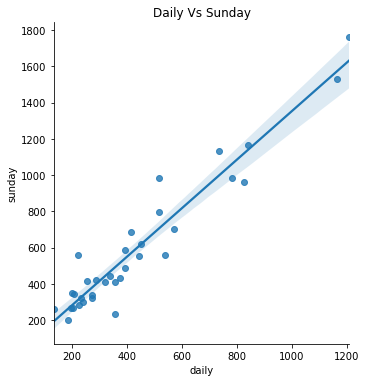

In [15]:
sns.lmplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

## 4. Data Preparation

In [18]:
del newspaper_data['Newspaper']

In [19]:
newspaper_data

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [20]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

In [21]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

## 5. Model Building.

It can be performed by using any of the following 2 libraries:

1. Statsmodels - OLS
2. sklearn - LinearRegression.

### 5.1 Using StatsModels build Linear Regression

In [22]:
import statsmodels.formula.api as smf

In [24]:
linear_model = smf.ols(formula = 'sunday~daily',data = newspaper_data)

## 6. Model Training

In [26]:
linear_model = linear_model.fit()

In [27]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## 7. Model Testing

### Manual Prediction

In [30]:
#If daily sales = 300, sunday sales? ---> 415.75
#(1.339715*300) + 13.835630
#If daily sales = 250, sunday sales? ---> 348.76
#(1.339715*250) + 13.835630
#If daily sales = 585, sunday sales? ---> 797.56
#(1.339715*585) + 13.835630

797.5689050000001

### Automatic Prediction

In [32]:
X_test = pd.DataFrame( data={'daily':[300,250,585]})
X_test

,daily
0,300
1,250
2,585


In [33]:
linear_model.predict(X_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64

## 8. Model Evaluation

### --------PARK------

## 9. Model Deployement

In [34]:
from pickle import dump

In [35]:
dump(linear_model,open('linear_intelligence.pkl','wb'))

In [36]:
from pickle import load

In [38]:
loaded_lin_model = load(open('linear_intelligence.pkl','rb'))

In [39]:
loaded_lin_model.predict(X_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64

# THE END!!!